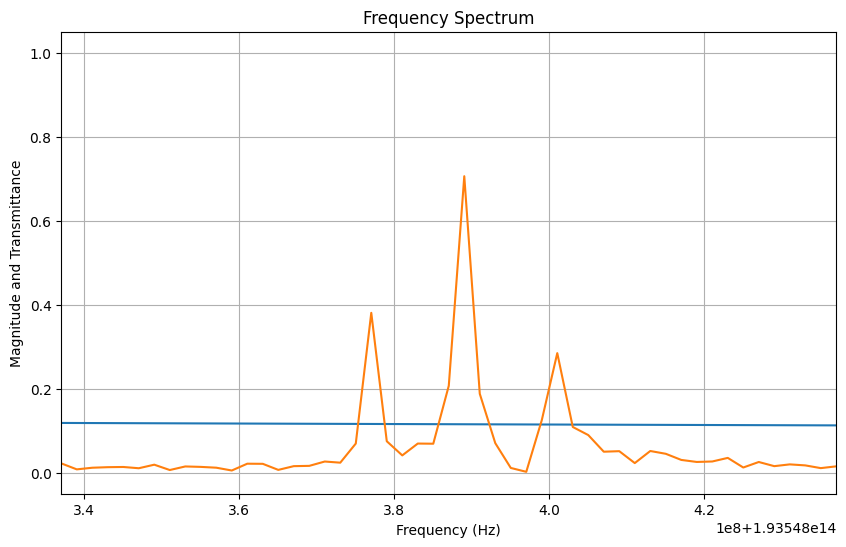

In [9]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
df = pd.read_csv('praktik6.csv')
spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
dt = spectr1[1] - spectr1[0]
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]
fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))
c= 3e8
h = 1550e-9
f_Er = c/h
freq = freq - 80e6 + c/h

k1 = k3 = 0.38
k2 = 0.065
l = 14.42e-3
L = 16.48e-3
n = 1.46
c = 3e8
T1 = n*l/c
T2 = n*L/c
α = 1.0
γ1 = np.exp(-α * l)
γ2 = np.exp(-α * L)
N = 7
M = 8
C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
C3 = np.sqrt(1-k3)
def t_filter_first(w):
    z = np.exp(1j*w*2*np.pi*T1/N)
    return  (1j * np.sqrt(γ1 * γ2 * k1 * k2 * k3) * np.sqrt(z**(-(N + M))))/(1 - C1 * C2 * γ1 * z**(-N) - C2 * C3 * γ2 * z**(-M)\
        + C1 * C3 * γ1 * γ2 * z**(-(N + M)))
def T_filter_first(freq):
    result = []
    for w in freq:
        value = t_filter_first(w)
        result.append(value)
    return np.array(result)
T_values = np.abs(T_filter_first(freq))

plt.figure(figsize = (10,6))
plt.plot(freq, T_values)
plt.plot(freq, np.abs(fft_signal_norm))
plt.xlim(c/h - 50e6 , c/h + 50e6)  # отображение только положительных частот
#plt.xticks(np.arange(min(freq) , max(freq), 50e7))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude and Transmittance')
plt.title('Frequency Spectrum')
plt.grid(True)
#plt.tight_layout()
plt.show()